In [1]:
#Import Stuff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#Credit Data
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [3]:
#Real Estate
df_NY = pd.read_csv("NYC_Real_Estate.csv")
df_NY.head()

BOROUGH  BLOCK  LOT  ZIP CODE  RESIDENTIAL UNITS  TOTAL UNITS  \
0        1    392    6     10009                  5            5   
1        1    402   21     10009                 10           10   
2        1    404   55     10009                  6            6   
3        1    406   32     10009                  8            8   
4        1    387  153     10009                 24           24   

   GROSS SQUARE FEET  YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440        1900                       Low   
1               6794        1913                       Low   
2               4615        1900                       Low   
3               4226        1920                       Low   
4              18523        1920                       Low   

  BUILDING CLASS AT TIME OF SALE  SALE PRICE  
0                             C2     6625000  
1                             C4     3936272  
2                             C2     8000000  
3                             C4     3192840  
4                             D9    16232000

<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<h2>Part 1: NYC Real Estate EDA

In [4]:
df_NY.describe()

BOROUGH         BLOCK           LOT      ZIP CODE  \
count  48248.000000  48248.000000  48248.000000  48248.000000   
mean       3.251554   4984.154535    234.400742  10939.604087   
std        0.903331   3427.528068    496.413133   1072.741157   
min        1.000000      1.000000      1.000000      0.000000   
25%        3.000000   2204.000000     21.000000  10469.000000   
50%        3.000000   4660.000000     45.000000  11217.000000   
75%        4.000000   6996.000000     94.000000  11237.000000   
max        5.000000  16319.000000   9009.000000  11694.000000   

       RESIDENTIAL UNITS   TOTAL UNITS  GROSS SQUARE FEET    YEAR BUILT  \
count       48248.000000  48248.000000       4.824800e+04  48248.000000   
mean            2.569682      2.837755       3.672552e+03   1827.738082   
std            17.468624     20.752771       2.947540e+04    464.418481   
min             0.000000      0.000000       0.000000e+00      0.000000   
25%             1.000000      1.000000       8.280000e+02   1920.000000   
50%             1.000000      1.000000       1.620000e+03   1931.000000   
75%             2.000000      2.000000       2.520000e+03   1961.000000   
max          1844.000000   2261.000000       3.750565e+06   2017.000000   

         SALE PRICE  
count  4.824800e+04  
mean   1.155576e+06  
std    1.340423e+07  
min    0.000000e+00  
25%    8.056000e+04  
50%    4.800000e+05  
75%    8.300000e+05  
max    2.210000e+09

In [5]:
df_NY['ZIP CODE'].value_counts()

11201    1324
11235    1312
11234    1165
11229     916
11215     899
         ... 
10006       1
10167       1
10803       1
10044       1
11005       1
Name: ZIP CODE, Length: 180, dtype: int64

In [6]:
df_NY = df_NY[df_NY['SALE PRICE']>0]
df_NY = df_NY.drop(columns={"TAX CLASS AT TIME OF SALE", "LOT", "RESIDENTIAL UNITS", "BUILDING CLASS AT TIME OF SALE" })
df_NY.describe()

BOROUGH         BLOCK      ZIP CODE   TOTAL UNITS  \
count  38020.000000  38020.000000  38020.000000  38020.000000   
mean       3.368438   5126.288769  10936.771883      2.741978   
std        0.964818   3634.279630   1023.802931     21.678107   
min        1.000000      1.000000      0.000000      0.000000   
25%        3.000000   2135.000000  10466.000000      1.000000   
50%        3.000000   4664.000000  11217.000000      1.000000   
75%        4.000000   7273.000000  11358.000000      2.000000   
max        5.000000  16319.000000  11694.000000   2261.000000   

       GROSS SQUARE FEET    YEAR BUILT    SALE PRICE  
count       3.802000e+04  38020.000000  3.802000e+04  
mean        3.574482e+03   1852.286744  1.466445e+06  
std         3.007989e+04    417.960253  1.508489e+07  
min         0.000000e+00      0.000000  1.000000e+00  
25%         8.835000e+02   1920.000000  3.850000e+05  
50%         1.552000e+03   1931.000000  6.000000e+05  
75%         2.352000e+03   1962.000000  9.500000e+05  
max         3.750565e+06   2017.000000  2.210000e+09

In [7]:
df_NY.head()

BOROUGH  BLOCK  ZIP CODE  TOTAL UNITS  GROSS SQUARE FEET  YEAR BUILT  \
0        1    392     10009            5               6440        1900   
1        1    402     10009           10               6794        1913   
2        1    404     10009            6               4615        1900   
3        1    406     10009            8               4226        1920   
4        1    387     10009           24              18523        1920   

   SALE PRICE  
0     6625000  
1     3936272  
2     8000000  
3     3192840  
4    16232000

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

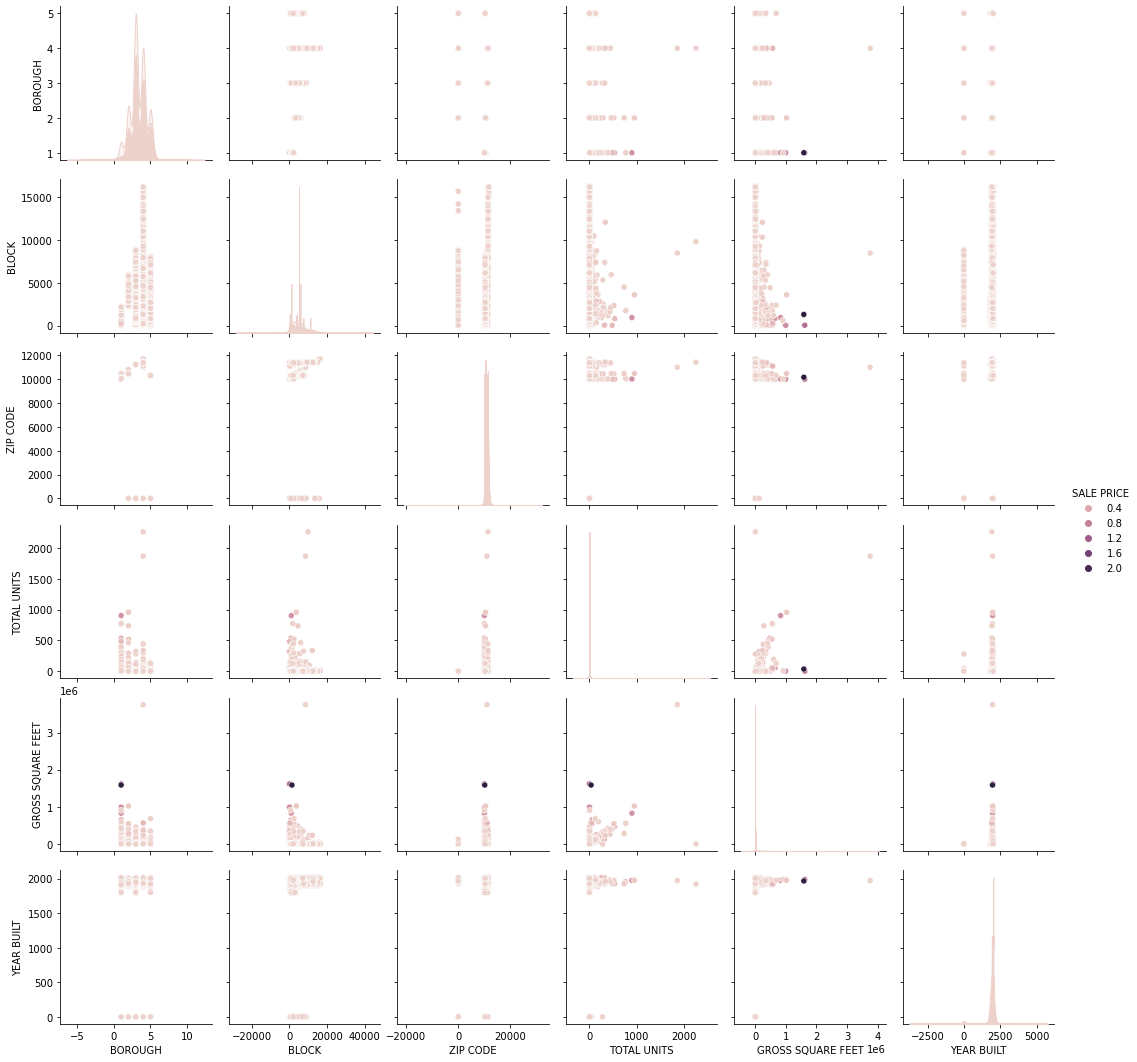

In [27]:
sns.pairplot(df_NY)

In [32]:
corr = df_NY.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

<h2>Credit Risk Data Set EDA<h2>

In [35]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [10]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [20]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [23]:
df = df.dropna()
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

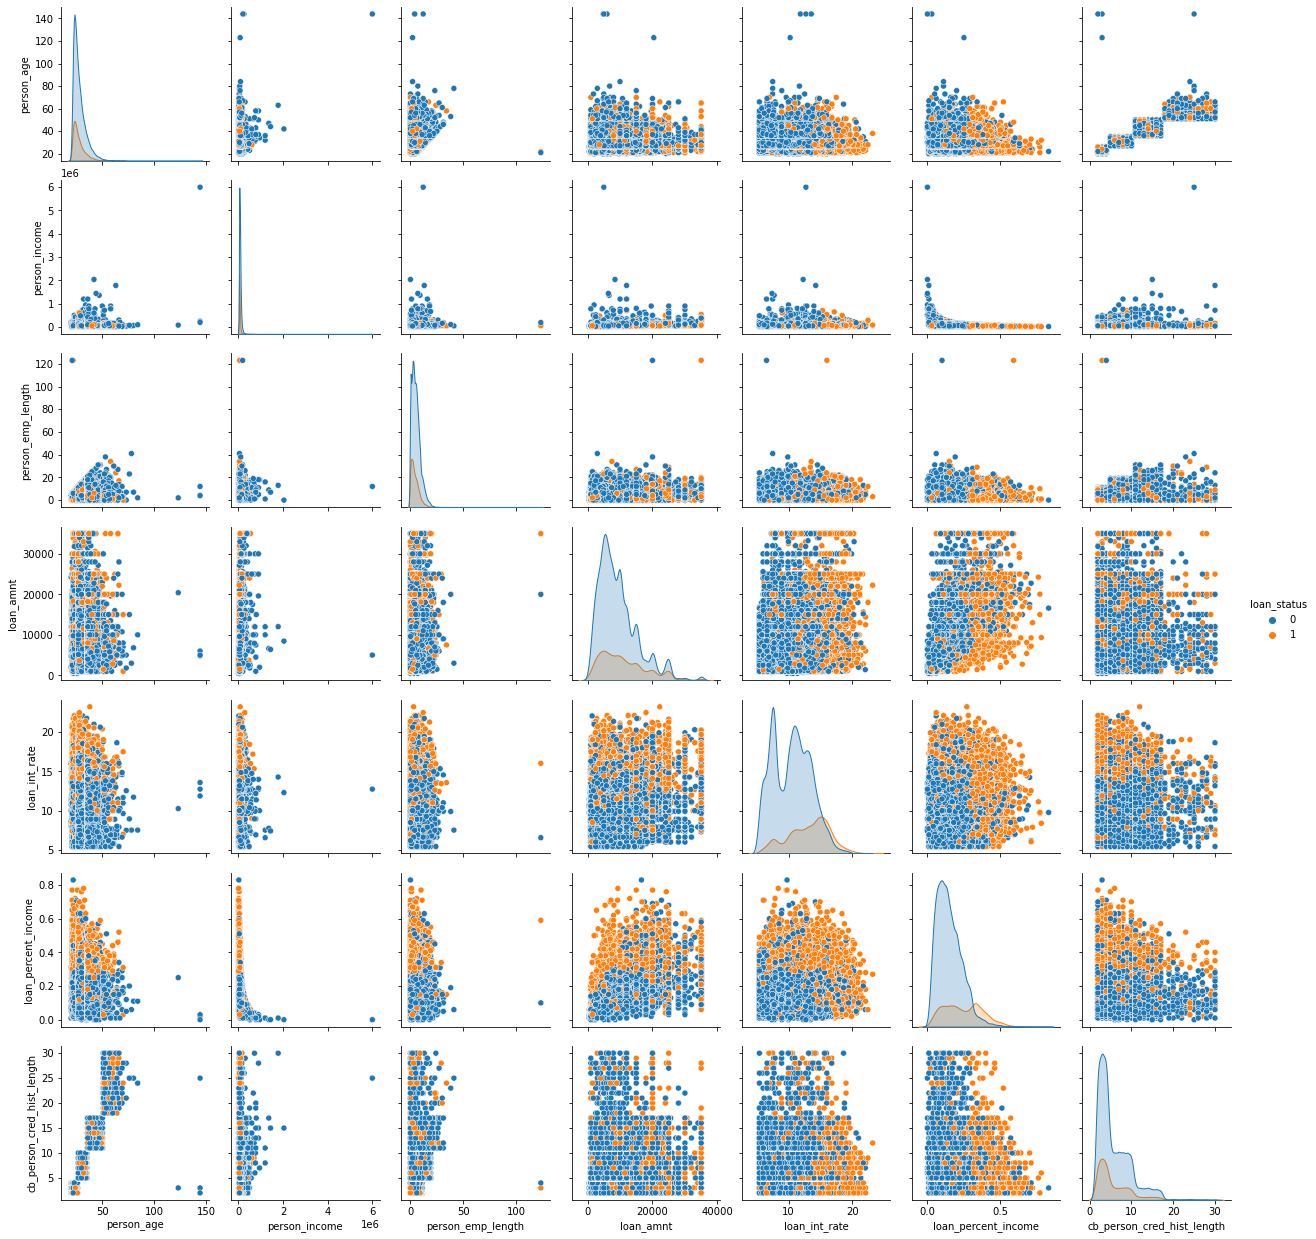

In [36]:
sns.pairplot(df, hue='loan_status')

In [34]:
df2 = pd.get_dummies(df, drop_first=True)
df2.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.59                           3   
1            0                 0.10                           2   
2            1                 0.57                           3   
3            1                 0.53                           2   
4            1                 0.55                           4   

   person_home_ownership_OTHER  person_home_ownership_OWN  ...  \
0                            0                          0  ...   
1                            0                          1  ...   
2                            0                          0  ...   
3                            0                          0  ...   
4                            0                          0  ...   

   loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  \
0                    0                     1                    0   
1                    0                     0                    0   
2                    1                     0                    0   
3                    1                     0                    0   
4                    1                     0                    0   

   loan_grade_B  loan_grade_C  loan_grade_D  loan_grade_E  loan_grade_F  \
0             0             0             1             0             0   
1             1             0             0             0             0   
2             0             1             0             0             0   
3             0             1             0             0             0   
4             0             1             0             0             0   

   loan_grade_G  cb_person_default_on_file_Y  
0             0                            1  
1             0                            0  
2             0                            0  
3             0                            0  
4             0                            1  

[5 rows x 23 columns]

<h2>Part 2: Linear Regression<h2>

In [50]:
y = np.array(df_NY["SALE PRICE"]).reshape(-1,1)
y.shape

(38020, 1)

In [51]:
x = np.array(df_NY.drop(columns={'SALE PRICE'}))
x.shape

(38020, 4)

In [52]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=.3)
print("X-Train:", xTrain.shape)
print("X-Test:", xTest.shape)
print("Y-Train:", yTrain.shape)
print("Y-Test:", yTest.shape)

X-Train: (26614, 4)
X-Test: (11406, 4)
Y-Train: (26614, 1)
Y-Test: (11406, 1)


In [53]:
model = LinearRegression()
model.fit(xTrain,yTrain)

LinearRegression()

In [54]:
import statsmodels.api as sm
X2 = sm.add_constant(xTrain)
est = sm.OLS(yTrain,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     1975.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:38:12   Log-Likelihood:            -4.7552e+05
No. Observations:               26614   AIC:                         9.511e+05
Df Residuals:                   26609   BIC:                         9.511e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.105e+06   3.17e+05     12.932      0.0

<h2>Zip code and Year Built can go.

In [48]:
df_NY = df_NY.drop(columns={'ZIP CODE', 'YEAR BUILT'})
df_NY.head()

BOROUGH  BLOCK  TOTAL UNITS  GROSS SQUARE FEET  SALE PRICE
0        1    392            5               6440     6625000
1        1    402           10               6794     3936272
2        1    404            6               4615     8000000
3        1    406            8               4226     3192840
4        1    387           24              18523    16232000

In [55]:
ypred = model.predict(xTest)
mean_squared_error(ypred,yTest,squared=False)

8928265.742523406

In [56]:
#Get some info on our new regression model
r_sq = model.score(x, y)
print('R-squared:', r_sq)
print('Intercept:', model.intercept_[0])

#Our coefficent/slope is now an array of values - one per X. 
#Visualizing the regression would be a 14D space, where these are the slopes in each dimension. 
print('Coefs:', model.coef_[0])

R-squared: 0.29923444218293593
Intercept: 4105217.8919389723
Coefs: [-7.72393019e+05 -1.27817222e+02 -1.54759911e+05  2.97668438e+02]


In [57]:
tmp = model.predict(x)
mean_squared_error(tmp, y, squared=False)

12627659.48161071

In [58]:
#Get Residuals and picture them in a DF for easy reading. 
tmp1 = pd.DataFrame(y, columns={"Y values"})
tmp2 = pd.DataFrame(tmp, columns={"Predictions"})
tmp3 = pd.DataFrame((y-tmp), columns={"Residual"})
resFrame = pd.concat([tmp1,tmp2,tmp3], axis=1)
resFrame.head()

Y values   Predictions      Residual
0   6625000  4.425906e+06  2.199094e+06
1   3936272  3.756203e+06  1.800694e+05
2   8000000  3.726367e+06  4.273633e+06
3   3192840  3.300799e+06 -1.079586e+05
4  16232000  5.082834e+06  1.114917e+07

<h2>logistic regression<h2>

In [17]:
y1 = np.array(df["loan_status"]).reshape(-1,1)
y1.shape

(32581, 1)

In [18]:
dfc = df.drop(columns={"loan_status"})
x1 = np.array(dfc)
dfc.shape

(32581, 11)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33)

md2 = LogisticRegression().fit(X_train,y_train.ravel())
md2Pred = md2.predict(X_test)
score = md2.score(X_test, y_test)
print(score)

ValueError: could not convert string to float: 'MORTGAGE'